In [1]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from scipy.signal import savgol_filter
plt.style.use('seaborn')

In [2]:
def create_list_of_items_in_node(item_type, h5_file, node):
    keys = []
    if item_type == "group":
        my_type = h5py._hl.group.Group
    if item_type == "dataset":
        my_type = h5py._hl.dataset.Dataset
    h5_file[node].visit(lambda key: keys.append(key) if type(h5_file[node][key]) is my_type else None)
    return keys

def create_list_of_calibrations_in_node(h5_file, node):
    calibrations = []
    all_groups = create_list_of_items_in_node("group", h5_file, node)
    for group in all_groups:
        if group[-6:-3] == 'cal':
            calibrations.append(group)
    return calibrations

def create_session_calibration_dict(h5_file):
    keys = list(h5_file.keys())
    key_dict = {}
    for key in keys:
        key_dict[key] = create_list_of_calibrations_in_node(h5_file, key)
    print(key_dict)
    return key_dict

In [3]:
path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"



In [4]:
file_names = ['210331_nirone_tests/nirone_test4.h5', 
              '210401_tests/next2/more_nirone_test1.h5',
             '210401_tests/vis_ftir_test1.h5',
             '210402_SOC_canister/tests_210402.h5',
             '210407_test_in_yard_and_canisters/nirone_210407.h5',
             '210407_test_in_yard_and_canisters/soc_210407.h5',
             '210409_stationary_moving/blank_210409.h5',
             '210409_stationary_moving/blank2_210409.h5',
             '210410_nirone_vibration/nirone_vibration_210410.h5',
             '210413_BNP_transect/BNP_data_collection_210413.h5',
             '210414_BNP_transect2/BNP_data_collection_210414.h5',
             '210415_nirone_tests/nirone_testing_210415.h5',
             '210415_visible_spec_tests/visspec_testing_210415.h5']

In [5]:
all_cals = []
for file_name in file_names:
    entire_path = f'{path_name}{file_name}'
    with h5py.File(entire_path, 'r') as h5_file:
        calibrations = create_list_of_calibrations_in_node(h5_file, "/")
        for calibration in calibrations:
            all_cals.append((entire_path, calibration))

        
       
        
        
    

In [6]:
for cal in all_cals:
    with h5py.File(cal[0], 'r') as h5_file:
        print(h5_file[cal[1]].attrs['white_spectrum'][0])

27622.0796875
27706.8
28947.56015625
28284.93984375
28131.0
4005.25
10379.0
10472.0
400.6
21843.0
10384.75
10211.0
10060.75
20387.0
21692.0
20927.0
10026.75
10175.75
8241.25
8159.0
8271.5
7984.0
8361.0
10037.0
6797.75
6768.75
6828.75
4194.5
18512.4
18286.8
18269.6
17955.619921875
18464.5796875
18983.659765625
9848.5
9887.5
9802.5
9772.0
9797.5
9832.25
9955.75
9492.0
9728.0
9825.75
9790.5
9748.0
9655.25
10163.5
10202.0
10128.75
10097.75


In [7]:
nirone_file_names = [
                     '210331_nirone_tests/nirone_test4.h5', 
                     '210401_tests/next2/more_nirone_test1.h5',             
                     '210407_test_in_yard_and_canisters/nirone_210407.h5',
                     '210409_stationary_moving/blank2_210409.h5',
                     '210410_nirone_vibration/nirone_vibration_210410.h5',             
                     '210415_nirone_tests/nirone_testing_210415.h5',
                     '210416_nirone_tests/nirone_testing_210416.h5']
nirone_file_dates = ['03/31/2021', '04/01/2021', '04/07/2021', 
                     '04/09/2021', '04/10/2021', '04/15/2021',
                     '04/16/2021']

In [8]:
nirone_cals = []
for file_name in nirone_file_names:
    entire_path = f'{path_name}{file_name}'
    print(file_name)
    with h5py.File(entire_path, 'r') as h5_file:
        calibrations = create_list_of_calibrations_in_node(h5_file, "/")
        for calibration in calibrations:
            nirone_cals.append((file_name, calibration))

210331_nirone_tests/nirone_test4.h5
210401_tests/next2/more_nirone_test1.h5
210407_test_in_yard_and_canisters/nirone_210407.h5
210409_stationary_moving/blank2_210409.h5
210410_nirone_vibration/nirone_vibration_210410.h5
210415_nirone_tests/nirone_testing_210415.h5
210416_nirone_tests/nirone_testing_210416.h5


In [9]:
len(nirone_cals)

21

# All calibration spectra to date, NIRONE

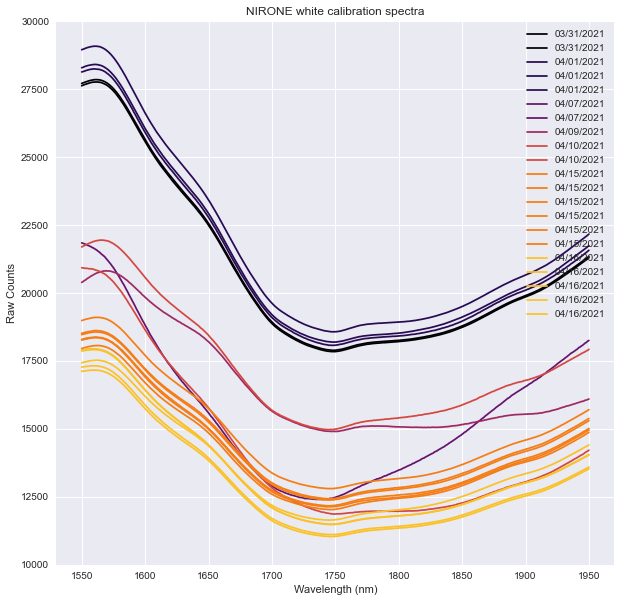

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("NIRONE white calibration spectra")
ax.set_ylabel("Raw Counts")
ax.set_xlabel("Wavelength (nm)")
ax.set_ylim(10000, 30000)
for cal in nirone_cals:
    entire_path = f'{path_name}{cal[0]}'
    
    
    
    with h5py.File(entire_path, 'r') as h5_file:
        
        
        color = plt.cm.inferno(nirone_file_names.index(cal[0])/len(nirone_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum'][:]
        waves = h5_file[cal[1]].attrs['spec1_wavelengths_vector'][:]
        label = nirone_file_dates[nirone_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
plt.legend(loc="upper right")
plt.show()
plt.close()
        

# NIRONE, calibration value at 1750 nm by date

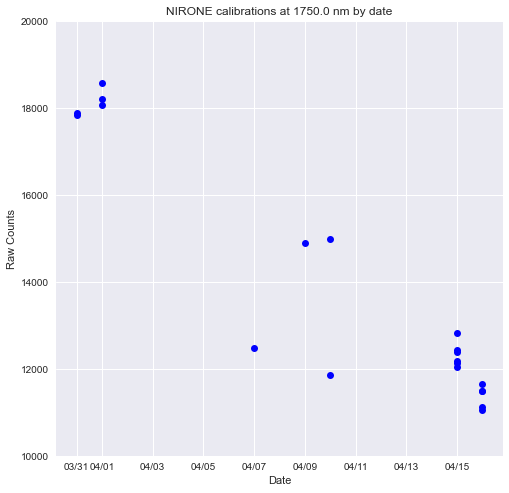

In [21]:
dates = []
date_strs = []
white_values = []
for cal in nirone_cals:
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        
        spectrum = h5_file[cal[1]].attrs['white_spectrum'][:]
        waves = h5_file[cal[1]].attrs['spec1_wavelengths_vector'][:]
        date_str = nirone_file_dates[nirone_file_names.index(cal[0])]
        date = datetime.datetime.strptime(date_str, '%m/%d/%Y').date()
        index_value = np.where(waves == 1750.0)
        white_value = spectrum[index_value][0]
        dates.append(date)
        date_strs.append(date_str)
        white_values.append(white_value)


fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("NIRONE calibrations at 1750.0 nm by date")
ax.set_xlabel("Date")
ax.set_ylabel("Raw Counts")
ax.set_ylim(10000, 20000)
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)


ax.plot_date(dates, white_values, 'bo')

plt.show()
plt.close()


In [22]:
vis_file_names = ['210401_tests/vis_ftir_test1.h5',
                  '210402_SOC_canister/tests_210402.h5',
                  '210407_test_in_yard_and_canisters/soc_210407.h5',
                  '210409_stationary_moving/blank_210409.h5',
                  '210413_BNP_transect/BNP_data_collection_210413.h5',
                  '210414_BNP_transect2/BNP_data_collection_210414.h5',
                  '210415_visible_spec_tests/visspec_testing_210415.h5',
                  '210416_green_tests/green_testing_210416.h5']
vis_file_dates =['04/01/2021', '04/02/2021', '04/07/2021',
                '04/09/2021', '04/13/2021', '04/14/2021',
                '04/15/2021', '04/16/2021']

In [24]:
vis_cals = []
for file_name in vis_file_names:
    entire_path = f'{path_name}{file_name}'
    print(file_name)
    with h5py.File(entire_path, 'r') as h5_file:
        calibrations = create_list_of_calibrations_in_node(h5_file, "/")
        for calibration in calibrations:
            vis_cals.append((file_name, calibration))

210401_tests/vis_ftir_test1.h5
210402_SOC_canister/tests_210402.h5
210407_test_in_yard_and_canisters/soc_210407.h5
210409_stationary_moving/blank_210409.h5
210413_BNP_transect/BNP_data_collection_210413.h5
210414_BNP_transect2/BNP_data_collection_210414.h5
210415_visible_spec_tests/visspec_testing_210415.h5
210416_green_tests/green_testing_210416.h5


# All calibration spectra to date, visible spectrometer

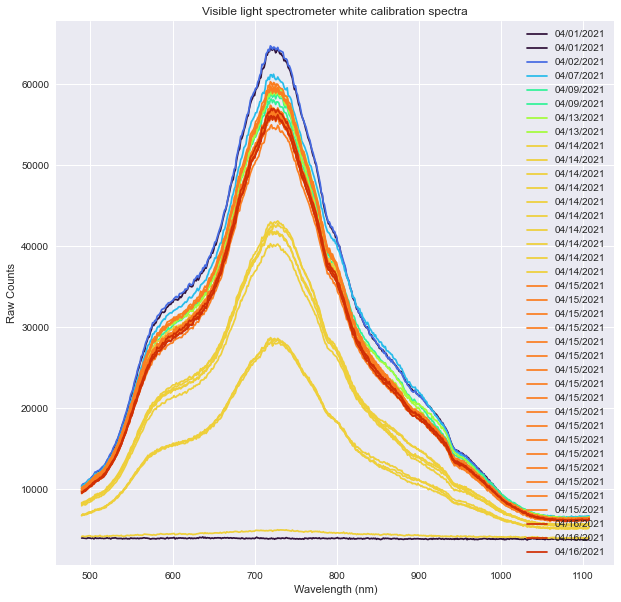

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Visible light spectrometer white calibration spectra")
ax.set_ylabel("Raw Counts")
ax.set_xlabel("Wavelength (nm)")
# ax.set_ylim(10000, 30000)
for cal in vis_cals:
    entire_path = f'{path_name}{cal[0]}'
    
    
    
    with h5py.File(entire_path, 'r') as h5_file:
        
        
        color = plt.cm.turbo(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum'][:]
        waves = h5_file[cal[1]].attrs['spec1_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
plt.legend(loc="upper right")
plt.show()
plt.close()

# Visible spectrometer white calibration peak value by date

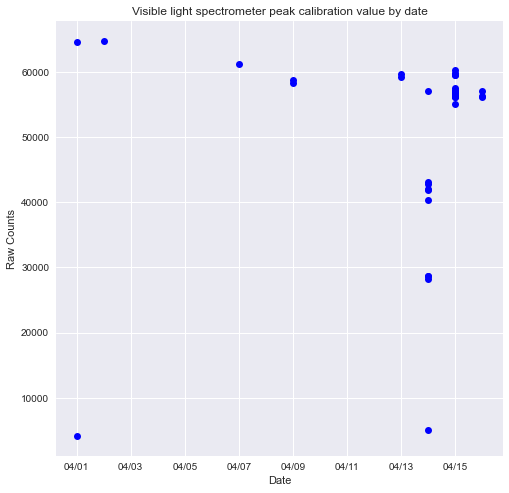

In [26]:
dates = []
date_strs = []
white_values = []
for cal in vis_cals:
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        
        spectrum = h5_file[cal[1]].attrs['white_spectrum'][:]
        waves = h5_file[cal[1]].attrs['spec1_wavelengths_vector'][:]
        date_str = vis_file_dates[vis_file_names.index(cal[0])]
        date = datetime.datetime.strptime(date_str, '%m/%d/%Y').date()
        
        white_value = spectrum.max()
        dates.append(date)
        date_strs.append(date_str)
        white_values.append(white_value)


fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Visible light spectrometer peak calibration value by date")
ax.set_xlabel("Date")
ax.set_ylabel("Raw Counts")
# ax.set_ylim(10000, 20000)
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)


ax.plot_date(dates, white_values, 'bo')

plt.show()
plt.close()

# FTIR engine, all white calibration spectra to date

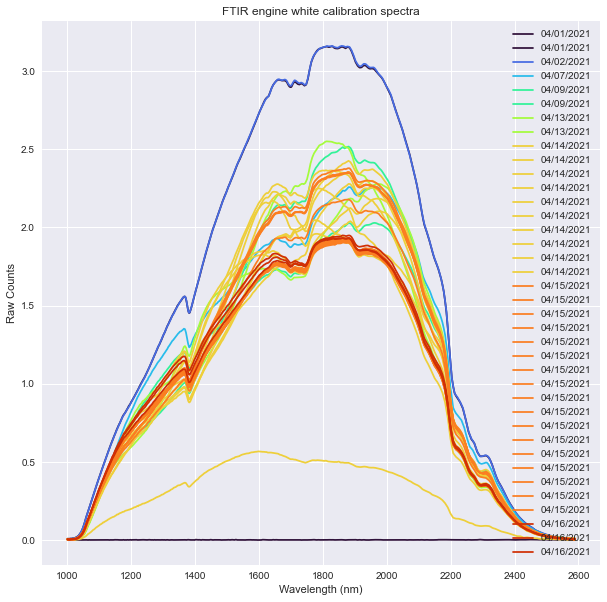

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("FTIR engine white calibration spectra")
ax.set_ylabel("Raw Counts")
ax.set_xlabel("Wavelength (nm)")
# ax.set_ylim(10000, 30000)
for cal in vis_cals:
    entire_path = f'{path_name}{cal[0]}'
    
    
    
    with h5py.File(entire_path, 'r') as h5_file:
        
        
        color = plt.cm.turbo(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:]
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
plt.legend(loc="upper right")
plt.show()
plt.close()

# FTIR Engine, peak white calibration value by date

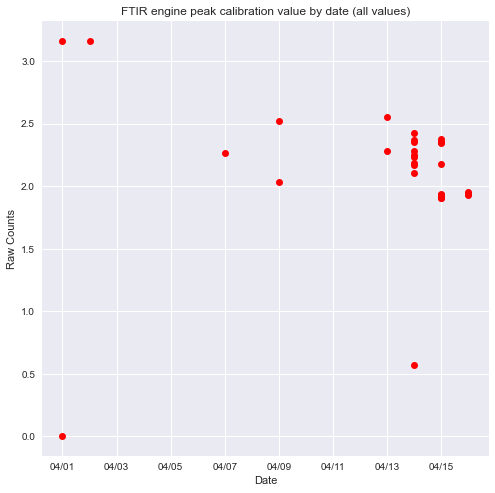

In [28]:
dates = []
date_strs = []
white_values = []
for cal in vis_cals:
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:]
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        date_str = vis_file_dates[vis_file_names.index(cal[0])]
        date = datetime.datetime.strptime(date_str, '%m/%d/%Y').date()
        
        white_value = spectrum.max()
        dates.append(date)
        date_strs.append(date_str)
        white_values.append(white_value)


fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("FTIR engine peak calibration value by date (all values)")
ax.set_xlabel("Date")
ax.set_ylabel("Raw Counts")
# ax.set_ylim(10000, 20000)
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)


ax.plot_date(dates, white_values, 'ro')

plt.show()
plt.close()

# Peak values by date, excluding outlier values

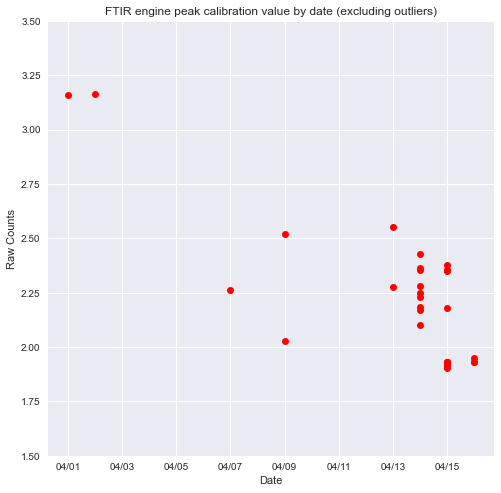

In [29]:
dates = []
date_strs = []
white_values = []
for cal in vis_cals:
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:]
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        date_str = vis_file_dates[vis_file_names.index(cal[0])]
        date = datetime.datetime.strptime(date_str, '%m/%d/%Y').date()
        
        white_value = spectrum.max()
        dates.append(date)
        date_strs.append(date_str)
        white_values.append(white_value)


fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("FTIR engine peak calibration value by date (excluding outliers)")
ax.set_xlabel("Date")
ax.set_ylabel("Raw Counts")
ax.set_ylim(1.5, 3.5)
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)


ax.plot_date(dates, white_values, 'ro')

plt.show()
plt.close()

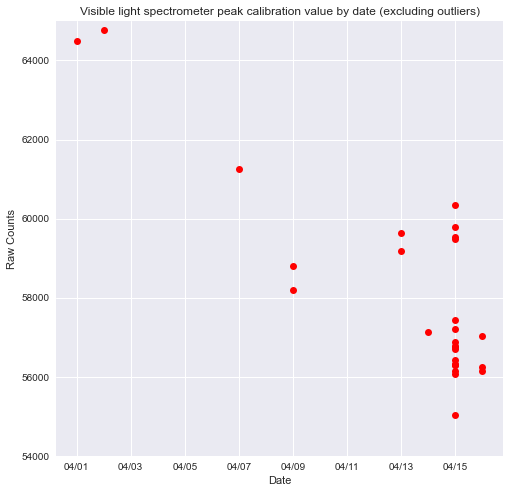

In [30]:
dates = []
date_strs = []
white_values = []
for cal in vis_cals:
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        
        spectrum = h5_file[cal[1]].attrs['white_spectrum'][:]
        waves = h5_file[cal[1]].attrs['spec1_wavelengths_vector'][:]
        date_str = vis_file_dates[vis_file_names.index(cal[0])]
        date = datetime.datetime.strptime(date_str, '%m/%d/%Y').date()
        
        white_value = spectrum.max()
        dates.append(date)
        date_strs.append(date_str)
        white_values.append(white_value)


fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Visible light spectrometer peak calibration value by date (excluding outliers)")
ax.set_xlabel("Date")
ax.set_ylabel("Raw Counts")
ax.set_ylim(54000, 65000)
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)


ax.plot_date(dates, white_values, 'ro')

plt.show()
plt.close()